In [1]:
#參考資料
#https://youtu.be/crQkHHhY7aY 12分鐘cluster
#https://www.interactivebrokers.com/campus/ibkr-quant-news/hierarchical-clustering-in-python-a-comprehensive-implementation-guide-part-ii/

#https://youtu.be/0U9cs2V-Mqc 13分鐘heatmap

#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib 顏色
#https://matplotlib.org/stable/users/explain/colors/colormaps.html 色條

#https://stackoverflow.com/questions/61816216/seaborn-clustermap-with-two-row-colors 兩條row_color


In [2]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [41]:
counts = pd.read_csv('nature.csv')
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
0,VHL,5.45,5.25,5.40,5.62,5.29,5.15,4.27,5.16,5.16,...,5.75,4.83,5.18,5.18,5.52,5.50,5.08,4.42,5.72,5.35
1,BAP1,7.28,6.93,6.92,7.39,7.24,7.36,6.67,7.06,6.97,...,7.01,7.49,7.27,7.15,7.24,7.09,7.17,6.34,7.27,6.99
2,PBRM1,5.51,6.11,6.44,5.62,5.83,5.34,5.71,6.52,6.11,...,6.36,5.96,5.83,5.74,5.59,6.47,5.92,5.51,6.35,5.76
3,TP53,5.47,5.65,5.41,5.38,5.91,5.44,6.06,5.21,5.53,...,6.29,5.03,6.56,5.51,6.67,6.53,6.09,5.39,5.75,6.26
4,PBRM1,5.51,6.11,6.44,5.62,5.83,5.34,5.71,6.52,6.11,...,6.36,5.96,5.83,5.74,5.59,6.47,5.92,5.51,6.35,5.76
5,ARID1A,7.03,7.02,7.40,7.56,6.82,7.02,6.68,6.62,6.84,...,7.26,5.82,6.45,7.06,7.17,7.05,6.91,5.78,7.26,6.43
6,SMARCA4,7.99,7.75,7.73,8.12,8.14,8.00,7.57,7.12,8.11,...,7.73,7.78,8.01,7.80,7.83,7.90,7.92,7.52,8.06,7.96
7,CD274,2.82,3.05,3.91,2.29,2.87,3.30,3.48,1.36,2.87,...,5.75,4.62,3.37,3.00,3.44,2.85,3.38,1.88,4.22,2.29
8,FH,6.38,6.47,6.00,6.53,6.44,6.39,6.04,7.02,6.64,...,5.75,6.69,6.38,6.54,6.22,5.99,6.42,6.15,6.19,6.15
9,MET,6.17,6.42,6.66,5.76,6.66,5.79,7.13,6.53,6.43,...,7.28,7.70,8.17,6.35,8.09,8.13,8.54,7.14,9.00,7.82


In [43]:
counts = counts.rename(columns={'Adjacent Kidney.1':'Adjacent Kidney',
                                'Adjacent Kidney.2':'Adjacent Kidney',
                                'Adjacent Kidney.3':'Adjacent Kidney'})
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
0,VHL,5.45,5.25,5.40,5.62,5.29,5.15,4.27,5.16,5.16,...,5.75,4.83,5.18,5.18,5.52,5.50,5.08,4.42,5.72,5.35
1,BAP1,7.28,6.93,6.92,7.39,7.24,7.36,6.67,7.06,6.97,...,7.01,7.49,7.27,7.15,7.24,7.09,7.17,6.34,7.27,6.99
2,PBRM1,5.51,6.11,6.44,5.62,5.83,5.34,5.71,6.52,6.11,...,6.36,5.96,5.83,5.74,5.59,6.47,5.92,5.51,6.35,5.76
3,TP53,5.47,5.65,5.41,5.38,5.91,5.44,6.06,5.21,5.53,...,6.29,5.03,6.56,5.51,6.67,6.53,6.09,5.39,5.75,6.26
4,PBRM1,5.51,6.11,6.44,5.62,5.83,5.34,5.71,6.52,6.11,...,6.36,5.96,5.83,5.74,5.59,6.47,5.92,5.51,6.35,5.76
5,ARID1A,7.03,7.02,7.40,7.56,6.82,7.02,6.68,6.62,6.84,...,7.26,5.82,6.45,7.06,7.17,7.05,6.91,5.78,7.26,6.43
6,SMARCA4,7.99,7.75,7.73,8.12,8.14,8.00,7.57,7.12,8.11,...,7.73,7.78,8.01,7.80,7.83,7.90,7.92,7.52,8.06,7.96
7,CD274,2.82,3.05,3.91,2.29,2.87,3.30,3.48,1.36,2.87,...,5.75,4.62,3.37,3.00,3.44,2.85,3.38,1.88,4.22,2.29
8,FH,6.38,6.47,6.00,6.53,6.44,6.39,6.04,7.02,6.64,...,5.75,6.69,6.38,6.54,6.22,5.99,6.42,6.15,6.19,6.15
9,MET,6.17,6.42,6.66,5.76,6.66,5.79,7.13,6.53,6.43,...,7.28,7.70,8.17,6.35,8.09,8.13,8.54,7.14,9.00,7.82


In [4]:
counts = counts.set_index('Gene Name')
counts

,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
Gene Name,,,,,,,,,,,,,,,,,,,,,
VHL,5.45,5.25,5.40,5.62,5.29,5.15,4.27,5.16,5.16,5.39,...,5.75,4.83,5.18,5.18,5.52,5.50,5.08,4.42,5.72,5.35
BAP1,7.28,6.93,6.92,7.39,7.24,7.36,6.67,7.06,6.97,6.77,...,7.01,7.49,7.27,7.15,7.24,7.09,7.17,6.34,7.27,6.99
PBRM1,5.51,6.11,6.44,5.62,5.83,5.34,5.71,6.52,6.11,6.20,...,6.36,5.96,5.83,5.74,5.59,6.47,5.92,5.51,6.35,5.76
TP53,5.47,5.65,5.41,5.38,5.91,5.44,6.06,5.21,5.53,5.47,...,6.29,5.03,6.56,5.51,6.67,6.53,6.09,5.39,5.75,6.26
PBRM1,5.51,6.11,6.44,5.62,5.83,5.34,5.71,6.52,6.11,6.20,...,6.36,5.96,5.83,5.74,5.59,6.47,5.92,5.51,6.35,5.76
ARID1A,7.03,7.02,7.40,7.56,6.82,7.02,6.68,6.62,6.84,6.84,...,7.26,5.82,6.45,7.06,7.17,7.05,6.91,5.78,7.26,6.43
SMARCA4,7.99,7.75,7.73,8.12,8.14,8.00,7.57,7.12,8.11,8.08,...,7.73,7.78,8.01,7.80,7.83,7.90,7.92,7.52,8.06,7.96
CD274,2.82,3.05,3.91,2.29,2.87,3.30,3.48,1.36,2.87,2.37,...,5.75,4.62,3.37,3.00,3.44,2.85,3.38,1.88,4.22,2.29
FH,6.38,6.47,6.00,6.53,6.44,6.39,6.04,7.02,6.64,6.46,...,5.75,6.69,6.38,6.54,6.22,5.99,6.42,6.15,6.19,6.15


In [5]:
counts = counts.T
counts

Gene Name,VHL,BAP1,PBRM1,TP53,PBRM1,ARID1A,SMARCA4,CD274,FH,MET,...,TFE3,MITF,ASPSCR1,PRCC,SFPQ,NONO,SMARCB1,FLCN,STK24,STK24-AS1
Adjacent Kidney,5.45,7.28,5.51,5.47,5.51,7.03,7.99,2.82,6.38,6.17,...,6.77,5.73,7.20,6.07,7.88,7.54,6.59,6.47,6.06,0.09
Adjacent Kidney.1,5.25,6.93,6.11,5.65,6.11,7.02,7.75,3.05,6.47,6.42,...,6.21,6.40,6.40,5.88,8.11,7.22,5.95,5.97,5.90,1.99
Adjacent Kidney.2,5.40,6.92,6.44,5.41,6.44,7.40,7.73,3.91,6.00,6.66,...,6.56,6.53,6.44,6.07,8.03,7.27,6.23,6.22,6.21,1.67
Adjacent Kidney.3,5.62,7.39,5.62,5.38,5.62,7.56,8.12,2.29,6.53,5.76,...,6.92,6.12,6.73,6.28,7.94,7.54,6.63,6.43,6.38,0.82
Adjacent Kidney.4,5.29,7.24,5.83,5.91,5.83,6.82,8.14,2.87,6.44,6.66,...,6.96,5.81,7.11,6.15,8.08,7.60,6.66,6.58,6.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Primary Tumour Papillary.3,5.50,7.09,6.47,6.53,6.47,7.05,7.90,2.85,5.99,8.13,...,6.69,6.65,6.89,5.91,8.22,7.61,6.27,6.91,5.92,1.70
Primary Tumour Papillary.4,5.08,7.17,5.92,6.09,5.92,6.91,7.92,3.38,6.42,8.54,...,6.53,6.72,6.97,5.69,7.75,7.61,6.11,7.25,5.96,0.34
Primary Tumour Papillary.5,4.42,6.34,5.51,5.39,5.51,5.78,7.52,1.88,6.15,7.14,...,5.56,6.35,6.61,5.43,7.53,6.86,6.35,5.99,4.72,1.88
Primary Tumour Papillary.6,5.72,7.27,6.35,5.75,6.35,7.26,8.06,4.22,6.19,9.00,...,6.68,7.13,6.65,6.10,8.30,7.59,6.12,6.34,6.23,1.60


In [6]:
minvalue_series = counts.min() 
minvalue_series

Gene Name
VHL          2.43
BAP1         4.75
PBRM1        4.42
TP53         3.55
PBRM1        4.42
ARID1A       5.78
SMARCA4      6.13
CD274        0.00
FH           3.84
MET          1.32
KIT          0.00
TERT         0.00
CCND1        4.66
CDKN2A       0.00
TFE3         4.39
MITF         2.66
ASPSCR1      4.60
PRCC         4.85
SFPQ         7.24
NONO         6.36
SMARCB1      5.10
FLCN         3.02
STK24        3.43
STK24-AS1    0.00
dtype: float64

In [7]:
maxvalue_series = counts.max() 
maxvalue_series

Gene Name
VHL          5.87
BAP1         7.84
PBRM1        7.37
TP53         6.93
PBRM1        7.37
ARID1A       7.60
SMARCA4      8.52
CD274        5.75
FH           7.33
MET          9.00
KIT          8.51
TERT         5.71
CCND1        8.82
CDKN2A       6.10
TFE3         7.66
MITF         7.13
ASPSCR1      7.48
PRCC         6.61
SFPQ         8.38
NONO         8.44
SMARCB1      7.00
FLCN         7.37
STK24        6.44
STK24-AS1    2.64
dtype: float64

In [8]:
counts

Gene Name,VHL,BAP1,PBRM1,TP53,PBRM1,ARID1A,SMARCA4,CD274,FH,MET,...,TFE3,MITF,ASPSCR1,PRCC,SFPQ,NONO,SMARCB1,FLCN,STK24,STK24-AS1
Adjacent Kidney,5.45,7.28,5.51,5.47,5.51,7.03,7.99,2.82,6.38,6.17,...,6.77,5.73,7.20,6.07,7.88,7.54,6.59,6.47,6.06,0.09
Adjacent Kidney.1,5.25,6.93,6.11,5.65,6.11,7.02,7.75,3.05,6.47,6.42,...,6.21,6.40,6.40,5.88,8.11,7.22,5.95,5.97,5.90,1.99
Adjacent Kidney.2,5.40,6.92,6.44,5.41,6.44,7.40,7.73,3.91,6.00,6.66,...,6.56,6.53,6.44,6.07,8.03,7.27,6.23,6.22,6.21,1.67
Adjacent Kidney.3,5.62,7.39,5.62,5.38,5.62,7.56,8.12,2.29,6.53,5.76,...,6.92,6.12,6.73,6.28,7.94,7.54,6.63,6.43,6.38,0.82
Adjacent Kidney.4,5.29,7.24,5.83,5.91,5.83,6.82,8.14,2.87,6.44,6.66,...,6.96,5.81,7.11,6.15,8.08,7.60,6.66,6.58,6.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Primary Tumour Papillary.3,5.50,7.09,6.47,6.53,6.47,7.05,7.90,2.85,5.99,8.13,...,6.69,6.65,6.89,5.91,8.22,7.61,6.27,6.91,5.92,1.70
Primary Tumour Papillary.4,5.08,7.17,5.92,6.09,5.92,6.91,7.92,3.38,6.42,8.54,...,6.53,6.72,6.97,5.69,7.75,7.61,6.11,7.25,5.96,0.34
Primary Tumour Papillary.5,4.42,6.34,5.51,5.39,5.51,5.78,7.52,1.88,6.15,7.14,...,5.56,6.35,6.61,5.43,7.53,6.86,6.35,5.99,4.72,1.88
Primary Tumour Papillary.6,5.72,7.27,6.35,5.75,6.35,7.26,8.06,4.22,6.19,9.00,...,6.68,7.13,6.65,6.10,8.30,7.59,6.12,6.34,6.23,1.60


In [39]:
counts = counts.T
counts

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
Gene Name,,,,,,,,,,,,,,,,,,,,,
Gene_Name,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
VHL,0.877907,0.819767,0.863372,0.927326,0.831395,0.790698,0.534884,0.793605,0.793605,0.860465,...,0.965116,0.697674,0.799419,0.799419,0.898256,0.892442,0.770349,0.578488,0.956395,0.848837
BAP1,0.81877,0.705502,0.702265,0.854369,0.805825,0.84466,0.621359,0.747573,0.718447,0.653722,...,0.731392,0.886731,0.815534,0.776699,0.805825,0.757282,0.783172,0.514563,0.815534,0.724919
PBRM1,0.369492,0.572881,0.684746,0.40678,0.477966,0.311864,0.437288,0.711864,0.572881,0.60339,...,0.657627,0.522034,0.477966,0.447458,0.39661,0.694915,0.508475,0.369492,0.654237,0.454237
TP53,0.568047,0.621302,0.550296,0.54142,0.698225,0.559172,0.742604,0.491124,0.585799,0.568047,...,0.810651,0.43787,0.890533,0.579882,0.923077,0.881657,0.751479,0.544379,0.650888,0.801775
PBRM1,0.369492,0.572881,0.684746,0.40678,0.477966,0.311864,0.437288,0.711864,0.572881,0.60339,...,0.657627,0.522034,0.477966,0.447458,0.39661,0.694915,0.508475,0.369492,0.654237,0.454237
ARID1A,0.686813,0.681319,0.89011,0.978022,0.571429,0.681319,0.494505,0.461538,0.582418,0.582418,...,0.813187,0.021978,0.368132,0.703297,0.763736,0.697802,0.620879,0.0,0.813187,0.357143
SMARCA4,0.778243,0.677824,0.669456,0.832636,0.841004,0.782427,0.60251,0.414226,0.828452,0.8159,...,0.669456,0.690377,0.786611,0.698745,0.711297,0.740586,0.748954,0.58159,0.807531,0.76569
CD274,0.490435,0.530435,0.68,0.398261,0.49913,0.573913,0.605217,0.236522,0.49913,0.412174,...,1.0,0.803478,0.586087,0.521739,0.598261,0.495652,0.587826,0.326957,0.733913,0.398261


In [10]:
for col in counts:
    counts[col] = (counts[col] - minvalue_series) / (maxvalue_series - minvalue_series)
counts

,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
Gene Name,,,,,,,,,,,,,,,,,,,,,
VHL,0.877907,0.819767,0.863372,0.927326,0.831395,0.790698,0.534884,0.793605,0.793605,0.860465,...,0.965116,0.697674,0.799419,0.799419,0.898256,0.892442,0.770349,0.578488,0.956395,0.848837
BAP1,0.818770,0.705502,0.702265,0.854369,0.805825,0.844660,0.621359,0.747573,0.718447,0.653722,...,0.731392,0.886731,0.815534,0.776699,0.805825,0.757282,0.783172,0.514563,0.815534,0.724919
PBRM1,0.369492,0.572881,0.684746,0.406780,0.477966,0.311864,0.437288,0.711864,0.572881,0.603390,...,0.657627,0.522034,0.477966,0.447458,0.396610,0.694915,0.508475,0.369492,0.654237,0.454237
TP53,0.568047,0.621302,0.550296,0.541420,0.698225,0.559172,0.742604,0.491124,0.585799,0.568047,...,0.810651,0.437870,0.890533,0.579882,0.923077,0.881657,0.751479,0.544379,0.650888,0.801775
PBRM1,0.369492,0.572881,0.684746,0.406780,0.477966,0.311864,0.437288,0.711864,0.572881,0.603390,...,0.657627,0.522034,0.477966,0.447458,0.396610,0.694915,0.508475,0.369492,0.654237,0.454237
ARID1A,0.686813,0.681319,0.890110,0.978022,0.571429,0.681319,0.494505,0.461538,0.582418,0.582418,...,0.813187,0.021978,0.368132,0.703297,0.763736,0.697802,0.620879,0.000000,0.813187,0.357143
SMARCA4,0.778243,0.677824,0.669456,0.832636,0.841004,0.782427,0.602510,0.414226,0.828452,0.815900,...,0.669456,0.690377,0.786611,0.698745,0.711297,0.740586,0.748954,0.581590,0.807531,0.765690
CD274,0.490435,0.530435,0.680000,0.398261,0.499130,0.573913,0.605217,0.236522,0.499130,0.412174,...,1.000000,0.803478,0.586087,0.521739,0.598261,0.495652,0.587826,0.326957,0.733913,0.398261
FH,0.727794,0.753582,0.618911,0.770774,0.744986,0.730659,0.630372,0.911175,0.802292,0.750716,...,0.547278,0.816619,0.727794,0.773639,0.681948,0.616046,0.739255,0.661891,0.673352,0.661891


In [12]:
#以下開始作圖

In [13]:
counts = counts.T
counts

Gene Name,VHL,BAP1,PBRM1,TP53,PBRM1,ARID1A,SMARCA4,CD274,FH,MET,...,TFE3,MITF,ASPSCR1,PRCC,SFPQ,NONO,SMARCB1,FLCN,STK24,STK24-AS1
Adjacent Kidney,0.877907,0.818770,0.369492,0.568047,0.369492,0.686813,0.778243,0.490435,0.727794,0.631510,...,0.727829,0.686801,0.902778,0.693182,0.561404,0.567308,0.784211,0.793103,0.873754,0.034091
Adjacent Kidney.1,0.819767,0.705502,0.572881,0.621302,0.572881,0.681319,0.677824,0.530435,0.753582,0.664062,...,0.556575,0.836689,0.625000,0.585227,0.763158,0.413462,0.447368,0.678161,0.820598,0.753788
Adjacent Kidney.2,0.863372,0.702265,0.684746,0.550296,0.684746,0.890110,0.669456,0.680000,0.618911,0.695312,...,0.663609,0.865772,0.638889,0.693182,0.692982,0.437500,0.594737,0.735632,0.923588,0.632576
Adjacent Kidney.3,0.927326,0.854369,0.406780,0.541420,0.406780,0.978022,0.832636,0.398261,0.770774,0.578125,...,0.773700,0.774049,0.739583,0.812500,0.614035,0.567308,0.805263,0.783908,0.980066,0.310606
Adjacent Kidney.4,0.831395,0.805825,0.477966,0.698225,0.477966,0.571429,0.841004,0.499130,0.744986,0.695312,...,0.785933,0.704698,0.871528,0.738636,0.736842,0.596154,0.821053,0.818391,0.906977,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Primary Tumour Papillary.3,0.892442,0.757282,0.694915,0.881657,0.694915,0.697802,0.740586,0.495652,0.616046,0.886719,...,0.703364,0.892617,0.795139,0.602273,0.859649,0.600962,0.615789,0.894253,0.827243,0.643939
Primary Tumour Papillary.4,0.770349,0.783172,0.508475,0.751479,0.508475,0.620879,0.748954,0.587826,0.739255,0.940104,...,0.654434,0.908277,0.822917,0.477273,0.447368,0.600962,0.531579,0.972414,0.840532,0.128788
Primary Tumour Papillary.5,0.578488,0.514563,0.369492,0.544379,0.369492,0.000000,0.581590,0.326957,0.661891,0.757812,...,0.357798,0.825503,0.697917,0.329545,0.254386,0.240385,0.657895,0.682759,0.428571,0.712121
Primary Tumour Papillary.6,0.956395,0.815534,0.654237,0.650888,0.654237,0.813187,0.807531,0.733913,0.673352,1.000000,...,0.700306,1.000000,0.711806,0.710227,0.929825,0.591346,0.536842,0.763218,0.930233,0.606061


In [14]:
counts = counts.reset_index(drop=False)
counts

Gene Name,index,VHL,BAP1,PBRM1,TP53,PBRM1,ARID1A,SMARCA4,CD274,FH,...,TFE3,MITF,ASPSCR1,PRCC,SFPQ,NONO,SMARCB1,FLCN,STK24,STK24-AS1
0,Adjacent Kidney,0.877907,0.818770,0.369492,0.568047,0.369492,0.686813,0.778243,0.490435,0.727794,...,0.727829,0.686801,0.902778,0.693182,0.561404,0.567308,0.784211,0.793103,0.873754,0.034091
1,Adjacent Kidney.1,0.819767,0.705502,0.572881,0.621302,0.572881,0.681319,0.677824,0.530435,0.753582,...,0.556575,0.836689,0.625000,0.585227,0.763158,0.413462,0.447368,0.678161,0.820598,0.753788
2,Adjacent Kidney.2,0.863372,0.702265,0.684746,0.550296,0.684746,0.890110,0.669456,0.680000,0.618911,...,0.663609,0.865772,0.638889,0.693182,0.692982,0.437500,0.594737,0.735632,0.923588,0.632576
3,Adjacent Kidney.3,0.927326,0.854369,0.406780,0.541420,0.406780,0.978022,0.832636,0.398261,0.770774,...,0.773700,0.774049,0.739583,0.812500,0.614035,0.567308,0.805263,0.783908,0.980066,0.310606
4,Adjacent Kidney.4,0.831395,0.805825,0.477966,0.698225,0.477966,0.571429,0.841004,0.499130,0.744986,...,0.785933,0.704698,0.871528,0.738636,0.736842,0.596154,0.821053,0.818391,0.906977,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Primary Tumour Papillary.3,0.892442,0.757282,0.694915,0.881657,0.694915,0.697802,0.740586,0.495652,0.616046,...,0.703364,0.892617,0.795139,0.602273,0.859649,0.600962,0.615789,0.894253,0.827243,0.643939
124,Primary Tumour Papillary.4,0.770349,0.783172,0.508475,0.751479,0.508475,0.620879,0.748954,0.587826,0.739255,...,0.654434,0.908277,0.822917,0.477273,0.447368,0.600962,0.531579,0.972414,0.840532,0.128788
125,Primary Tumour Papillary.5,0.578488,0.514563,0.369492,0.544379,0.369492,0.000000,0.581590,0.326957,0.661891,...,0.357798,0.825503,0.697917,0.329545,0.254386,0.240385,0.657895,0.682759,0.428571,0.712121
126,Primary Tumour Papillary.6,0.956395,0.815534,0.654237,0.650888,0.654237,0.813187,0.807531,0.733913,0.673352,...,0.700306,1.000000,0.711806,0.710227,0.929825,0.591346,0.536842,0.763218,0.930233,0.606061


In [15]:
counts = counts.rename(columns={'index':'Gene_Name'})
counts

Gene Name,Gene_Name,VHL,BAP1,PBRM1,TP53,PBRM1,ARID1A,SMARCA4,CD274,FH,...,TFE3,MITF,ASPSCR1,PRCC,SFPQ,NONO,SMARCB1,FLCN,STK24,STK24-AS1
0,Adjacent Kidney,0.877907,0.818770,0.369492,0.568047,0.369492,0.686813,0.778243,0.490435,0.727794,...,0.727829,0.686801,0.902778,0.693182,0.561404,0.567308,0.784211,0.793103,0.873754,0.034091
1,Adjacent Kidney.1,0.819767,0.705502,0.572881,0.621302,0.572881,0.681319,0.677824,0.530435,0.753582,...,0.556575,0.836689,0.625000,0.585227,0.763158,0.413462,0.447368,0.678161,0.820598,0.753788
2,Adjacent Kidney.2,0.863372,0.702265,0.684746,0.550296,0.684746,0.890110,0.669456,0.680000,0.618911,...,0.663609,0.865772,0.638889,0.693182,0.692982,0.437500,0.594737,0.735632,0.923588,0.632576
3,Adjacent Kidney.3,0.927326,0.854369,0.406780,0.541420,0.406780,0.978022,0.832636,0.398261,0.770774,...,0.773700,0.774049,0.739583,0.812500,0.614035,0.567308,0.805263,0.783908,0.980066,0.310606
4,Adjacent Kidney.4,0.831395,0.805825,0.477966,0.698225,0.477966,0.571429,0.841004,0.499130,0.744986,...,0.785933,0.704698,0.871528,0.738636,0.736842,0.596154,0.821053,0.818391,0.906977,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Primary Tumour Papillary.3,0.892442,0.757282,0.694915,0.881657,0.694915,0.697802,0.740586,0.495652,0.616046,...,0.703364,0.892617,0.795139,0.602273,0.859649,0.600962,0.615789,0.894253,0.827243,0.643939
124,Primary Tumour Papillary.4,0.770349,0.783172,0.508475,0.751479,0.508475,0.620879,0.748954,0.587826,0.739255,...,0.654434,0.908277,0.822917,0.477273,0.447368,0.600962,0.531579,0.972414,0.840532,0.128788
125,Primary Tumour Papillary.5,0.578488,0.514563,0.369492,0.544379,0.369492,0.000000,0.581590,0.326957,0.661891,...,0.357798,0.825503,0.697917,0.329545,0.254386,0.240385,0.657895,0.682759,0.428571,0.712121
126,Primary Tumour Papillary.6,0.956395,0.815534,0.654237,0.650888,0.654237,0.813187,0.807531,0.733913,0.673352,...,0.700306,1.000000,0.711806,0.710227,0.929825,0.591346,0.536842,0.763218,0.930233,0.606061


In [37]:
counts.to_csv('counts.csv', index=False)

ValueError: The number of FixedLocator locations (26), usually from a call to set_ticks, does not match the number of labels (128).

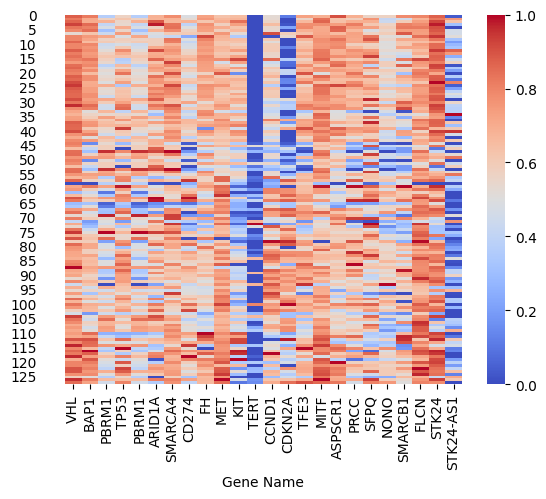

In [35]:
lut = {'Adjacent Kidney': 'darkgreen',
       'Metastasis CCRCC': 'darkred',
       'Primary Tumour CCRCC': 'olivedrab',
       'Primary Tumour Chromophobe': 'mediumblue',
       'Primary Tumour FH Def RCC': 'goldenrod',
       'Primary Tumour Oncocytic': 'purple',
       'Primary Tumour Papillary': 'palevioletred',
      }
row_colors = counts['Gene_Name'].map(lut)

ax = sns.heatmap(counts.drop(['Gene_Name'], axis=1), cmap = 'coolwarm')
#cmap = 'RdYlBu'/'coolwarm'/'bwr'/'seismic'

# plt.yticks([0,5,10,15,20,25,30,35,40,45,
#             50,55,60,65,70,75,80,85,90,95,
#             100,105,110,115,120,125
#            ],
#            ["X1","X2","X3","X4","X5","X1","X2","X3","X4","X5",
#             "X1","X2","X3","X4","X5","X1","X2","X3","X4","X5",
#             "X1","X2","X3","X4","X5","X1"
#            ]) #方案3，直接改變顯示

ax.tick_params(axis='y', which='major', pad=20.5, length=0) #y軸文字
ax.set_yticklabels(counts['Gene_Name'], rotation=0) # optionally use the groups as the tick labels

for i, color in enumerate(row_colors):
    ax.add_patch(plt.Rectangle(xy=(-0.055, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax.get_yaxis_transform(), clip_on=False)) #add row_color

plt.tight_layout()
plt.savefig("teacher.pdf", format="pdf", facecolor='white', bbox_inches="tight")

In [ ]:
#畫cluster

In [ ]:
counts